In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 8 CLUSTERING DAY1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 2: Directory settings  ####

main_dir = '/Users/datasociety/desktop/af-werx'
data_dir = main_dir + "/data"

In [2]:
#=================================================-
#### Slide 3: Loading packages  ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering



In [3]:
#### Slide 4: Working directory  ####
# Set working directory.
os.chdir(data_dir)
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


In [4]:
#### Slide 14: Data prep  ####

temp_heart = pd.read_csv("temp_heart_rate.csv")
temp_heart.head()

,Gender,Body Temp,Heart Rate
0,Male,96.3,70
1,Male,96.7,71
2,Male,96.9,74
3,Male,97.0,80
4,Male,97.1,73


In [5]:
#### Slide 15: Data cleaning: NAs  ####
temp_heart.isnull().sum()

Gender        0
Body Temp     0
Heart Rate    0
dtype: int64

In [6]:
#### Slide 16: Subset data  ####

# Subset even further to just have 'Body Temp' and 'Heart Rate'.
temp_heart_cluster = temp_heart[['Body Temp','Heart Rate']]
temp_heart_cluster.head()

,Body Temp,Heart Rate
0,96.3,70
1,96.7,71
2,96.9,74
3,97.0,80
4,97.1,73


In [7]:
#### Slide 17: Numeric variables  ####

# Check data type of our variables.
temp_heart_cluster.dtypes

Body Temp     float64
Heart Rate      int64
dtype: object

In [7]:
#### Slide 20: K-means data prep using  MinMaxScaler  ####

# Instantiate MinMaxScaler.
scaler = MinMaxScaler()

# Scale the dataframe.
temp_heart_cluster_scaled = scaler.fit_transform(temp_heart_cluster)
# Convert back to dataframe, making sure to name the columns again.
temp_heart_kmeans = pd.DataFrame(temp_heart_cluster_scaled, columns = temp_heart_cluster.columns)
temp_heart_kmeans.head()



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Body Temp,Heart Rate
0,0.000000,0.40625
1,0.088889,0.43750
2,0.133333,0.53125
3,0.155556,0.71875
4,0.177778,0.50000


Text(0.5, 0, 'Body Temp')

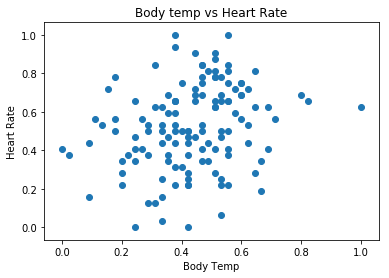

In [8]:
#### Slide 26: K-means: Body Temp vs Heart Rate  ####

# Plot the data.
plt.scatter(temp_heart_kmeans['Body Temp'],
temp_heart_kmeans['Heart Rate'])

plt.title('Body temp vs Heart Rate')
plt.ylabel('Heart Rate')
plt.xlabel('Body Temp')

In [33]:
#### Slide 27: K-means: k-means with k=2  ####

# K-means - start with 2 clusters.
# Initializing k-means.
kmeans_2 = KMeans(n_clusters=2)
# Fitting with inputs.
kmeans_2 = kmeans_2.fit(temp_heart_kmeans)
# Predicting the clusters.
labels = kmeans_2.predict(temp_heart_kmeans)
# Getting the cluster centers.
C_2 = kmeans_2.cluster_centers_
print(C_2)

[[0.50444444 0.71666667]
 [0.37206349 0.35848214]]


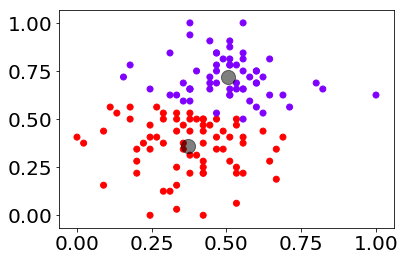

In [40]:
#### Slide 28: K-means: plot k=2  ####

# First, we plot our clusters, colored in by the labels.
q

In [ ]:
#### Slide 30: Exercise 1  ####

In [9]:
#### Slide 37: Elbow method  ####

# Set the range of k.
K_MAX = 20
KK = range(1,K_MAX+1)

# Run `kmeans` for values in the range k = 1-20.
KM = [kmeans(temp_heart_kmeans,k) for k in KK]

# Find the centroids for each KM output.
centroids = [cent for (cent,var) in KM]

# Calculate centroids for each iteration of k.
D_k = [cdist(temp_heart_kmeans, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

# WSS
tot_withinss = [sum(d**2) for d in dist]       # Total within-cluster sum of squares
#TSS
totss = sum(pdist(temp_heart_kmeans)**2)/temp_heart_kmeans.shape[0]   # The total sum of squares
#BSS
betweenss = totss - tot_withinss                                # The between-cluster sum of squares


Text(0.5, 1.0, 'Elbow for KMeans clustering')

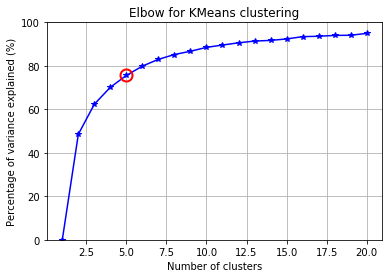

In [10]:
#=================================================-
#### Slide 39: Elbow plot method  ####

# Set range for k.
kIdx = 4        # K=5
clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')



In [11]:
#=================================================-
#### Slide 40: Baseline vs. optimal k  ####

# Explained variance for optimal number of clusters at `k = 2`.
print(betweenss[1]/totss * 100)
# Explained variance for optimal number of clusters at `k = 5`.
print(betweenss[4]/totss * 100)



48.51255790975613
75.59263774261922


In [13]:
#=================================================-
#### Slide 41: Run optimal k  ####

# Initializing K-means.
kmeans_5 = KMeans(n_clusters = 5)
# Fitting with inputs.
kmeans_5 = kmeans_5.fit(temp_heart_kmeans)
# Predicting the clusters.
labels = kmeans_5.predict(temp_heart_kmeans)
# Getting the cluster centers.
C_5 = kmeans_5.cluster_centers_



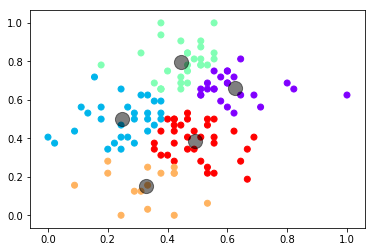

In [14]:
#=================================================-
#### Slide 42: Plot k = 5  ####

# First we plot our clusters, colored in by the labels.
plt.scatter(temp_heart_kmeans.iloc[:,0],
            temp_heart_kmeans.iloc[:,1],
            c = kmeans_5.labels_,
            cmap = 'rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(C_5[:, 0],
            C_5[:, 1],
            c = 'black',
            s = 200,
            alpha = 0.5)



NameError: name 'kmeans_2' is not defined

<Figure size 432x288 with 0 Axes>

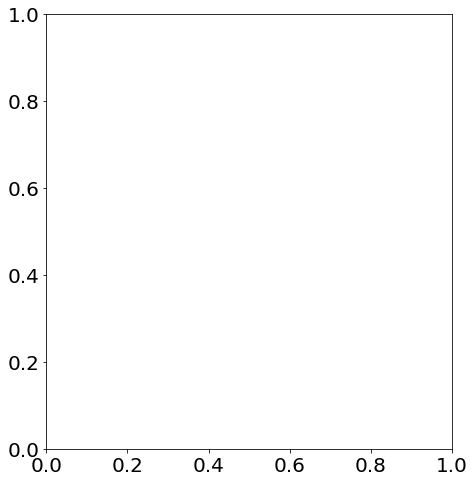

In [15]:
#=================================================-
#### Slide 43: Plot k = 2 vs. k = 5  ####

plt.clf()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.scatter(temp_heart_kmeans.iloc[:,0],temp_heart_kmeans.iloc[:,1],c=kmeans_2.labels_,cmap='rainbow')
plt.scatter(C_2[:, 0], C_2[:, 1], c='black', s=200,alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(temp_heart_kmeans.iloc[:,0],temp_heart_kmeans.iloc[:,1],
c=kmeans_5.labels_, cmap='rainbow')
plt.scatter(C_5[:, 0], C_5[:, 1], c='black', s=200, alpha=0.5)




In [16]:
#=================================================-
#### Slide 45: Inspect clusters  ####

# Append the other variables back to the dataframe with clusters.
clustered_temp_heart = temp_heart_cluster
# Add cluster numbers.
clustered_temp_heart['clusters'] = pd.Series(labels)
clustered_temp_heart.head()



,Body Temp,Heart Rate,clusters
0,96.3,70,1
1,96.7,71,1
2,96.9,74,1
3,97.0,80,1
4,97.1,73,1


In [17]:
#=================================================-
#### Slide 46: Inspect clusters  ####

# Group by `clusters` column to see the group mean of each variable.
cluster_groups_means = clustered_temp_heart.groupby('clusters').mean()
print(cluster_groups_means)



          Body Temp  Heart Rate
clusters                       
0         99.108333   78.208333
1         97.410345   72.965517
2         98.307143   82.428571
3         97.780000   61.933333
4         98.517647   69.382353


In [ ]:
#=================================================-
#### Slide 50: Exercise 2  ####





In [18]:
#=================================================-
#### Slide 69: Distance matrix  ####

temp_heart_hier = temp_heart_kmeans
# Calculate the distance matrix.
temp_heart_dist = pdist(temp_heart_hier, 'euclidean')
temp_heart_dist



array([0.09422206, 0.18276427, 0.34907561, ..., 0.03834566, 0.20953818,
       0.18050346])

In [19]:
#=================================================-
#### Slide 71: Agglomerative clustering  ####

# Linkage matrix
temp_heart_linked = linkage(temp_heart_dist, 'ward')
temp_heart_linked[:5]



array([[ 25.,  30.,   0.,   2.],
       [ 82., 130.,   0.,   3.],
       [ 50., 101.,   0.,   2.],
       [ 86.,  89.,   0.,   2.],
       [ 42.,  99.,   0.,   2.]])

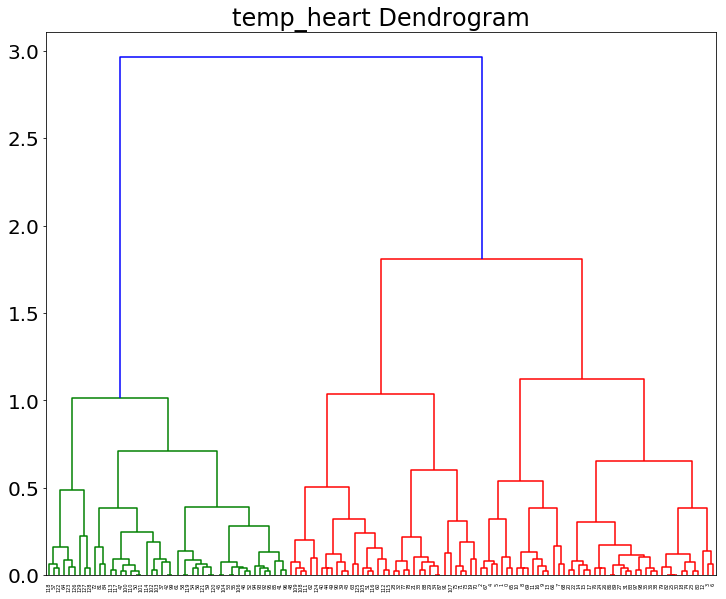

In [20]:
#=================================================-
#### Slide 73: Visualizing dendrogram  ####

# Plot the dendrogram.
plt.figure(figsize = (12, 10))
plt.title( "temp_heart Dendrogram")
dendo = dendrogram(temp_heart_linked)
plt.show()



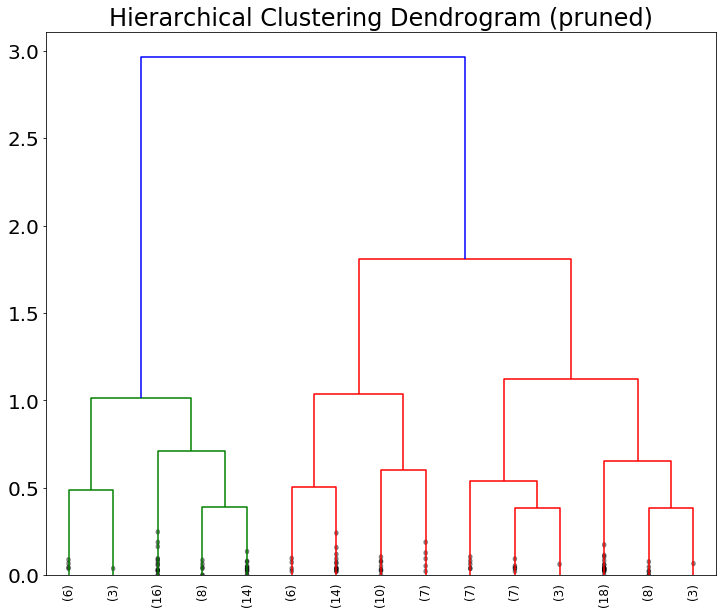

In [21]:
#=================================================-
#### Slide 74: Optimizing and pruning the dendrogram  ####

# Prune the tree to 10 leaf nodes.
plt.figure(figsize=(12,10))
plt.title('Hierarchical Clustering Dendrogram (pruned)')
dendrogram(temp_heart_linked,
           truncate_mode='lastp',   # show only the last p merged clusters
           p = 15,                  # show only the last p merged clustersshow_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90,
           leaf_font_size=12,
           show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()



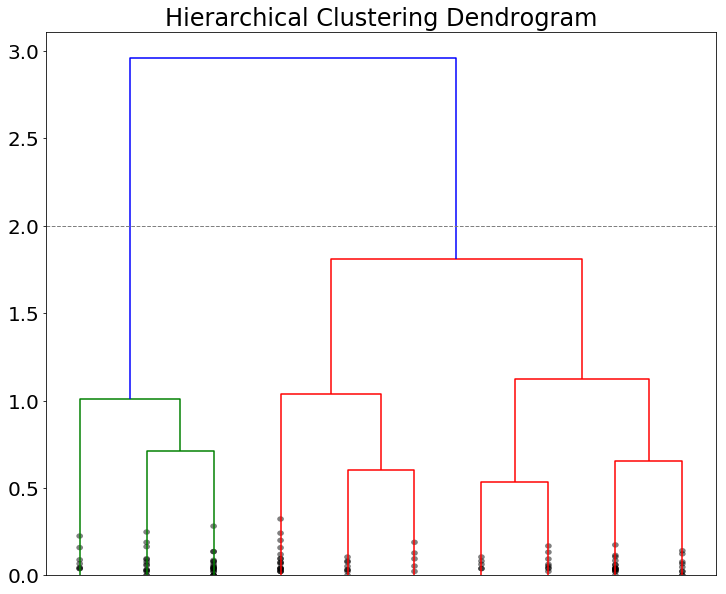

In [22]:
#=================================================-
#### Slide 75: Optimizing and pruning the dendrogram  ####

# View only the last 5 merges.
plt.figure(figsize = (12, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(temp_heart_linked,
           truncate_mode = 'lastp',
           p = 10,
           show_leaf_counts = False,
           leaf_rotation = 90,
           leaf_font_size = 12,
           show_contracted = True,
           color_threshold = 2   # <- nodes greater than the threshold are colored blue
          )
           # Add horizontal line.
plt.axhline(y = 2, 
            c='grey',
            lw=1, 
            linestyle='dashed')




In [23]:
#=================================================-
#### Slide 76: Assign data points to clusters  ####

# Assign the data points to clusters.

temp_heart_clusters = AgglomerativeClustering(n_clusters = 2,        # <- 2 clusters
affinity = 'euclidean',
linkage = 'ward')

temp_heart_clusters.fit_predict(temp_heart_hier)
print(temp_heart_clusters.labels_)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1]


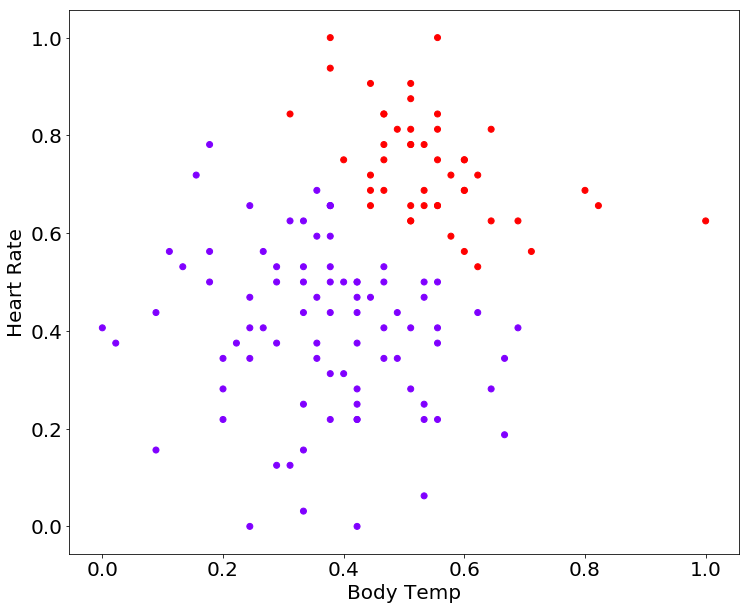

In [24]:
#=================================================-
#### Slide 77: Assign data points to clusters  ####

# Plot the clusters.
plt.figure(figsize = (12, 10))
plt.xlabel('Body Temp')
plt.ylabel('Heart Rate')
plt.scatter(temp_heart_hier['Body Temp'], temp_heart_hier['Heart Rate'], c = temp_heart_clusters.labels_, cmap = 'rainbow')

